<a href="https://colab.research.google.com/github/CamiloLoaiza12/Analitica2_trabajo1/blob/main/Selecci%C3%B3n_de_variables_y_regularizaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importar datos
#from google.colab import drive
#drive.mount('/content/drive')

In [1]:
## Remove Warnings
import warnings
warnings.filterwarnings("ignore")

## Data
import pandas as pd
import numpy as np
from itertools import product

## Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

## Modelling
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error,  mean_absolute_error, mean_absolute_percentage_error, r2_score, classification_report
import math

In [2]:
# Importar librerias necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

%matplotlib inline

In [3]:
# Importar librerias necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

%matplotlib inline

In [4]:
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.datasets import make_classification
from collections import Counter

DESCRIPCION DE LAS VARIABLES

# IMPORTACION DE DATOS

In [5]:
tabla_base = pd.read_csv('tabla_base.csv', sep = ",")

In [119]:
tabla_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   desercion_año_anterior         4410 non-null   object 
 1   frecuencia_viajes              4410 non-null   object 
 2   departamento                   4410 non-null   object 
 3   distancia_domicilio            4410 non-null   int64  
 4   educacion                      4410 non-null   int64  
 5   formacion                      4410 non-null   object 
 6   nivel_de_cargo                 4410 non-null   int64  
 7   nombre_cargo                   4410 non-null   object 
 8   estado_civil                   4410 non-null   object 
 9   ingresos_mensuales             4410 non-null   int64  
 10  empresas_anteriores            4410 non-null   float64
 11  porcentaje_aumentosalario      4410 non-null   int64  
 12  nivel_de_opciones              4410 non-null   i

# Normalización

In [6]:
tablabase=tabla_base.copy()
columnascategoricas=["numero_capacitaciones","frecuencia_viajes"]
tablabase[columnascategoricas] = tablabase[columnascategoricas].astype(str)
tablabase.dtypes

desercion_año_anterior            object
frecuencia_viajes                 object
departamento                      object
distancia_domicilio                int64
educacion                          int64
formacion                         object
nivel_de_cargo                     int64
nombre_cargo                      object
estado_civil                      object
ingresos_mensuales                 int64
empresas_anteriores              float64
porcentaje_aumentosalario          int64
nivel_de_opciones                  int64
años_de_trabajo                  float64
numero_capacitaciones             object
años_jefe_actual                   int64
satisfaccion_entorno             float64
satisfaccion_laboral             float64
conciliacion_faimilar_laboral    float64
implicacion_laboral                int64
tiempo_prom_dia                  float64
dtype: object

In [7]:
tablabase["desercion"]=tablabase['desercion_año_anterior'].replace({'No':0, 'Yes':1})
del tablabase['desercion_año_anterior']
tablabase

,frecuencia_viajes,departamento,distancia_domicilio,educacion,formacion,nivel_de_cargo,nombre_cargo,estado_civil,ingresos_mensuales,empresas_anteriores,...,nivel_de_opciones,años_de_trabajo,numero_capacitaciones,años_jefe_actual,satisfaccion_entorno,satisfaccion_laboral,conciliacion_faimilar_laboral,implicacion_laboral,tiempo_prom_dia,desercion
0,Travel_Rarely,Sales,6,2,Life Sciences,1,Healthcare Representative,Married,131160,1.0,...,0,1.0,6,0,3.0,4.0,2.0,3,6.8702,0
1,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Research Scientist,Single,41890,0.0,...,1,6.0,3,4,3.0,2.0,4.0,2,7.3160,1
2,Travel_Frequently,Research & Development,17,4,Other,4,Sales Executive,Married,193280,1.0,...,3,5.0,2,3,2.0,2.0,1.0,3,6.8161,0
3,Non-Travel,Research & Development,2,5,Life Sciences,3,Human Resources,Married,83210,3.0,...,3,13.0,5,5,4.0,4.0,3.0,2,6.7892,0
4,Travel_Rarely,Research & Development,10,1,Medical,1,Sales Executive,Single,23420,4.0,...,2,9.0,2,4,4.0,1.0,3.0,3,7.8776,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,Travel_Rarely,Research & Development,5,4,Medical,1,Research Scientist,Single,60290,3.0,...,1,10.0,5,2,4.0,1.0,3.0,3,8.3169,0
4406,Travel_Rarely,Research & Development,2,4,Medical,1,Laboratory Technician,Divorced,26790,2.0,...,0,10.0,2,2,4.0,4.0,3.0,2,5.8972,0
4407,Travel_Rarely,Research & Development,25,2,Life Sciences,2,Sales Executive,Married,37020,0.0,...,0,5.0,4,2,1.0,3.0,3.0,3,7.1495,0
4408,Travel_Rarely,Sales,18,2,Medical,1,Laboratory Technician,Divorced,23980,0.0,...,1,10.0,2,8,4.0,1.0,3.0,2,9.1876,0


In [8]:
tablabase1=pd.get_dummies(tablabase)
tablabase1

,distancia_domicilio,educacion,nivel_de_cargo,ingresos_mensuales,empresas_anteriores,porcentaje_aumentosalario,nivel_de_opciones,años_de_trabajo,años_jefe_actual,satisfaccion_entorno,...,estado_civil_Divorced,estado_civil_Married,estado_civil_Single,numero_capacitaciones_0,numero_capacitaciones_1,numero_capacitaciones_2,numero_capacitaciones_3,numero_capacitaciones_4,numero_capacitaciones_5,numero_capacitaciones_6
0,6,2,1,131160,1.0,11,0,1.0,0,3.0,...,0,1,0,0,0,0,0,0,0,1
1,10,1,1,41890,0.0,23,1,6.0,4,3.0,...,0,0,1,0,0,0,1,0,0,0
2,17,4,4,193280,1.0,15,3,5.0,3,2.0,...,0,1,0,0,0,1,0,0,0,0
3,2,5,3,83210,3.0,11,3,13.0,5,4.0,...,0,1,0,0,0,0,0,0,1,0
4,10,1,1,23420,4.0,12,2,9.0,4,4.0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,5,4,1,60290,3.0,17,1,10.0,2,4.0,...,0,0,1,0,0,0,0,0,1,0
4406,2,4,1,26790,2.0,15,0,10.0,2,4.0,...,1,0,0,0,0,1,0,0,0,0
4407,25,2,2,37020,0.0,20,0,5.0,2,1.0,...,0,1,0,0,0,0,0,1,0,0
4408,18,2,1,23980,0.0,14,1,10.0,8,4.0,...,1,0,0,0,0,1,0,0,0,0


### NORMALIZACION

In [9]:
tablabase1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 46 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   distancia_domicilio                     4410 non-null   int64  
 1   educacion                               4410 non-null   int64  
 2   nivel_de_cargo                          4410 non-null   int64  
 3   ingresos_mensuales                      4410 non-null   int64  
 4   empresas_anteriores                     4410 non-null   float64
 5   porcentaje_aumentosalario               4410 non-null   int64  
 6   nivel_de_opciones                       4410 non-null   int64  
 7   años_de_trabajo                         4410 non-null   float64
 8   años_jefe_actual                        4410 non-null   int64  
 9   satisfaccion_entorno                    4410 non-null   float64
 10  satisfaccion_laboral                    4410 non-null   floa

In [10]:
y=tablabase1["desercion"]
x=tablabase1.drop(["desercion"],axis=1)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

columnasenteras=["distancia_domicilio","educacion","nivel_de_cargo","ingresos_mensuales","porcentaje_aumentosalario","nivel_de_opciones","años_jefe_actual","implicacion_laboral"]
tablabase1[columnasenteras]=tablabase1[columnasenteras].astype(float)
columnasfloat=list(tablabase1.select_dtypes("float64").columns)
pipeline=ColumnTransformer([("num", StandardScaler(),columnasfloat)],remainder='passthrough')

X_train_std = pipeline.fit_transform(X_train)
X_test_std = pipeline.transform(X_test)

# Modelo 1

In [11]:
from sklearn.metrics import accuracy_score

# Entrenamiento del modelo
modelo = LogisticRegression()

# Ajustar el modelo a los datos
modelo.fit(X_train_std, y_train)

# Desempeño en el entrenamiento
y_train_pred = modelo.predict(X_train_std)

print('Exactitud en el entrenamiento: %.3f'  %accuracy_score(y_train, y_train_pred) )

Exactitud en el entrenamiento: 0.866


In [12]:
y_pred = modelo.predict(X_test_std)

# Exactitud en el conjunto de validación
print('Exactitud en el entrenamiento: %.3f'  %accuracy_score(y_test, y_pred))

Exactitud en el entrenamiento: 0.840


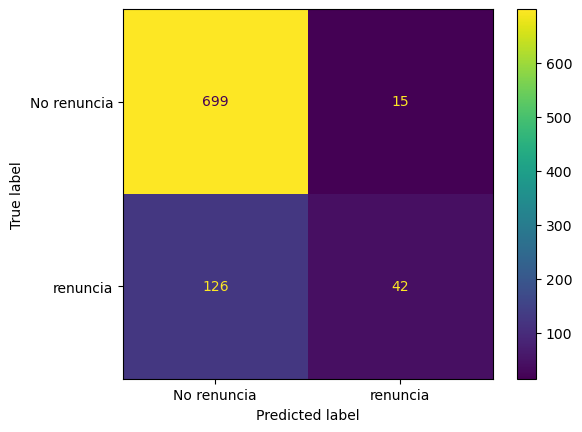

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
matriz= confusion_matrix(y_test, y_pred)
matriz_display = ConfusionMatrixDisplay(confusion_matrix=matriz, display_labels=['No renuncia', 'renuncia'])
matriz_display.plot()
plt.show()

In [14]:
tn, fp, fn, tp = matriz.ravel()

precision = tp / (tp + fp)
recall = tp / (tp + fn)
especificidad = tn / (fp + tn)
f1_score = 2*(precision*recall)/(precision+recall)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'Especificidad: {especificidad}')
print(f'F1 score: {f1_score}')

Precision: 0.7368421052631579
Recall: 0.25
Especificidad: 0.9789915966386554
F1 score: 0.37333333333333335


In [149]:
# Metricas
print("MSE: %.2f" % mean_squared_error(y_test, y_pred))
print("RMSE %.2f" % math.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE: %.2f" % mean_absolute_error(y_test, y_pred))
print("MAPE: %.2f" % mean_absolute_percentage_error(y_test, y_pred))
print("R2: %.2f" % r2_score(y_test, y_pred))

# R2 ajustado
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test_std.shape[1]-1)
print("R2-adjusted: %.2f" % adj_r2)

MSE: 0.15
RMSE 0.39
MAE: 0.15
MAPE: 91910196476949.05
R2: -0.12
R2-adjusted: -0.18


# Modelo 1.1

In [15]:
from sklearn.metrics import accuracy_score
X_train_std1=X_train_std.copy()
X_test_std1=X_test_std.copy()
# Entrenamiento del modelo
modelo1 = LogisticRegression(class_weight="balanced",random_state=142)

# Ajustar el modelo a los datos
modelo1.fit(X_train_std1, y_train)

# Desempeño en el entrenamiento
y_train_pred1 = modelo1.predict(X_train_std1)

print('Exactitud en el entrenamiento: %.3f'  %accuracy_score(y_train, y_train_pred1) )

Exactitud en el entrenamiento: 0.746


In [16]:
y_pred1 = modelo1.predict(X_test_std1)

# Exactitud en el conjunto de validación
print('Exactitud en el entrenamiento: %.3f'  %accuracy_score(y_test, y_pred1))

Exactitud en el entrenamiento: 0.715


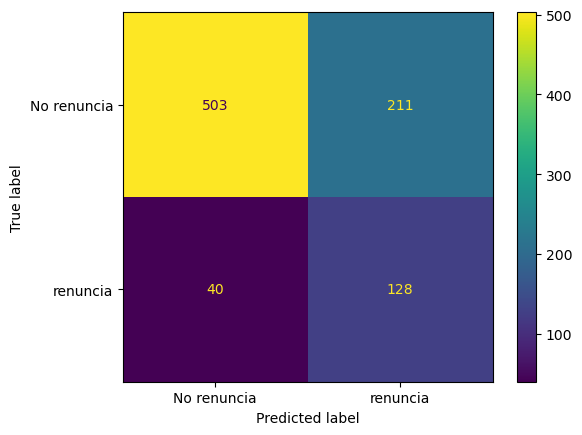

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
matriz1= confusion_matrix(y_test, y_pred1)
matriz_display1 = ConfusionMatrixDisplay(confusion_matrix=matriz1, display_labels=['No renuncia', 'renuncia'])
matriz_display1.plot()
plt.show()

In [18]:
tn, fp, fn, tp = matriz1.ravel()

precision = tp / (tp + fp)
recall = tp / (tp + fn)
especificidad = tn / (fp + tn)
f1_score = 2*(precision*recall)/(precision+recall)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'Especificidad: {especificidad}')
print(f'F1 score: {f1_score}')

Precision: 0.3775811209439528
Recall: 0.7619047619047619
Especificidad: 0.7044817927170869
F1 score: 0.504930966469428


In [19]:
# Metricas
print("MSE: %.2f" % mean_squared_error(y_test, y_pred1))
print("RMSE %.2f" % math.sqrt(mean_squared_error(y_test, y_pred1)))
print("MAE: %.2f" % mean_absolute_error(y_test, y_pred1))
print("MAPE: %.2f" % mean_absolute_percentage_error(y_test, y_pred1))
print("R2: %.2f" % r2_score(y_test, y_pred1))

# R2 ajustado
r2 = r2_score(y_test, y_pred1)
adj_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test_std1.shape[1]-1)
print("R2-adjusted: %.2f" % adj_r2)

MSE: 0.28
RMSE 0.53
MAE: 0.28
MAPE: 1077391747590901.00
R2: -0.85
R2-adjusted: -0.94


# Penalizar clases mayoritarias y balanceo de clases

# BALANCEO DE CLASES

In [20]:
os_us = SMOTETomek()
x_train_res, y_train_res = os_us.fit_resample(X_train_std, y_train)

print ("Distribution before resampling {}".format(Counter(y_train)))
print ("Distribution after resampling {}".format(Counter(y_train_res)))

Distribution before resampling Counter({0: 2985, 1: 543})
Distribution after resampling Counter({0: 2985, 1: 2985})


# SELECCION DE VARIABLES

## Metodo integrado (LASSO - MODELO 2)

In [21]:
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression,  f_classif, mutual_info_classif, chi2

In [22]:
# metodo integrado
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso, Ridge

In [42]:

sel_ = SelectFromModel(Lasso(alpha = 0.001, max_iter=10000), max_features=20) #entre mas aumente el parametro de serializacon, ams variables van atender a 0
sel_.fit(X_train_std, y_train)
print(sel_.estimator_.coef_)

#Obtener variables seleccionadas
X_new = sel_.get_support()#descarta los coeficientes mas cercanos a 0
X_train_modelo2 = X_train_std[:,X_new]
X_test_modelo2= X_test_std[:,X_new]
X_train.iloc[:,X_new]

[-0.00000000e+00 -8.48737024e-03 -8.37603610e-03 -3.47768250e-03
  2.59344888e-02  6.97874786e-03 -4.28958974e-03 -5.34775278e-02
 -2.34872296e-02 -4.65760658e-02 -4.09628791e-02 -1.77278697e-02
 -8.29039929e-03  6.80270711e-02 -4.58433561e-02  7.71520215e-02
  0.00000000e+00  9.57352342e-02 -0.00000000e+00 -2.42464616e-03
  9.16894364e-02  1.08738494e-02  0.00000000e+00 -0.00000000e+00
 -2.50612703e-05 -2.17212074e-02 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -9.52071717e-03 -3.62297894e-02  7.78259081e-02
  1.62437686e-04  1.76672041e-02 -2.65605567e-02 -9.83915096e-03
 -0.00000000e+00  1.02440769e-01  0.00000000e+00  0.00000000e+00
  3.27746147e-02  4.27071390e-02 -1.72173858e-03 -7.02916283e-03
 -3.52986769e-02]


,empresas_anteriores,años_de_trabajo,años_jefe_actual,satisfaccion_entorno,satisfaccion_laboral,conciliacion_faimilar_laboral,tiempo_prom_dia,frecuencia_viajes_Non-Travel,frecuencia_viajes_Travel_Frequently,departamento_Human Resources,formacion_Human Resources,formacion_Technical Degree,nombre_cargo_Manufacturing Director,nombre_cargo_Research Director,nombre_cargo_Sales Executive,nombre_cargo_Sales Representative,estado_civil_Single,numero_capacitaciones_2,numero_capacitaciones_3,numero_capacitaciones_6
2845,3.0,12.0,4,3.0,4.0,1.0,10.2751,0,0,0,0,0,1,0,0,0,0,0,0,0
1936,1.0,5.0,2,4.0,3.0,3.0,6.2365,0,0,0,0,0,0,0,0,0,0,0,1,0
744,2.0,10.0,2,3.0,4.0,3.0,7.0996,0,1,0,0,0,0,1,0,0,1,1,0,0
24,1.0,10.0,9,2.0,4.0,2.0,6.5804,0,1,0,0,0,0,0,0,0,1,1,0,0
3589,7.0,26.0,10,2.0,2.0,3.0,6.4262,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3826,7.0,10.0,3,4.0,1.0,3.0,6.7086,0,1,0,0,0,0,0,0,0,1,0,0,0
1277,2.0,21.0,2,4.0,3.0,3.0,7.8859,0,0,0,0,0,0,0,0,0,0,1,0,0
2704,0.0,13.0,11,1.0,2.0,3.0,5.9979,0,0,0,0,0,0,0,0,0,1,1,0,0
4107,0.0,10.0,1,2.0,4.0,3.0,8.3416,0,0,0,0,0,0,0,0,0,0,1,0,0


In [43]:
from sklearn.metrics import accuracy_score

# Entrenamiento del modelo
modelo = LogisticRegression(random_state=142, class_weight='balanced')

# Ajustar el modelo a los datos
modelo.fit(X_train_modelo2, y_train)

# Desempeño en el entrenamiento
y_train_pred2 = modelo.predict(X_train_modelo2)

print('Exactitud en el entrenamiento: %.3f'  %accuracy_score(y_train, y_train_pred2) )

Exactitud en el entrenamiento: 0.735


In [44]:
y_pred = modelo.predict(X_test_modelo2)

# Exactitud en el conjunto de validación
print('Exactitud en el entrenamiento: %.3f'  %accuracy_score(y_test, y_pred))

Exactitud en el entrenamiento: 0.706


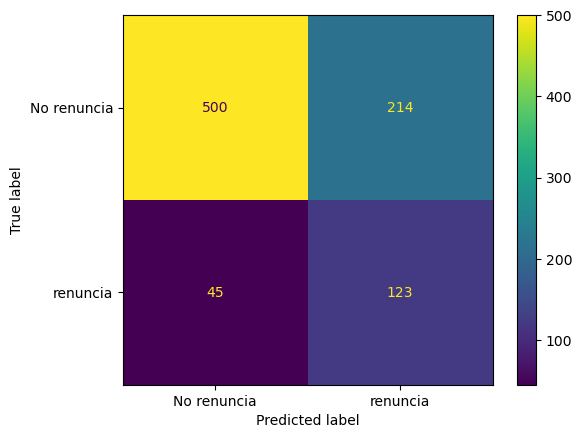

In [45]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
matriz= confusion_matrix(y_test, y_pred)
matriz_display = ConfusionMatrixDisplay(confusion_matrix=matriz, display_labels=['No renuncia', 'renuncia'])
matriz_display.plot()
plt.show()

In [46]:
tn, fp, fn, tp = matriz.ravel()

precision = tp / (tp + fp)
recall = tp / (tp + fn)
especificidad = tn / (fp + tn)
f1_score = 2*(precision*recall)/(precision+recall)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'Especificidad: {especificidad}')
print(f'F1 score: {f1_score}')

Precision: 0.3649851632047478
Recall: 0.7321428571428571
Especificidad: 0.7002801120448179
F1 score: 0.4871287128712871


In [47]:
# Metricas
print("MSE: %.2f" % mean_squared_error(y_test, y_pred))
print("RMSE %.2f" % math.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE: %.2f" % mean_absolute_error(y_test, y_pred))
print("MAPE: %.2f" % mean_absolute_percentage_error(y_test, y_pred))
print("R2: %.2f" % r2_score(y_test, y_pred))

# R2 ajustado
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test_std1.shape[1]-1)
print("R2-adjusted: %.2f" % adj_r2)

MSE: 0.29
RMSE 0.54
MAE: 0.29
MAPE: 1092710113670392.50
R2: -0.90
R2-adjusted: -1.01


In [48]:
from sklearn.metrics import accuracy_score

# Entrenamiento del modelo
modelo = LogisticRegression(random_state=142)

# Ajustar el modelo a los datos
modelo.fit(x_train_res, y_train_res)

# Desempeño en el entrenamiento
y_train_pred2 = modelo.predict(x_train_res)

print('Exactitud en el entrenamiento: %.3f'  %accuracy_score(y_train_res, y_train_pred2) )

Exactitud en el entrenamiento: 0.771


In [49]:
y_pred = modelo.predict(X_test_std)

# Exactitud en el conjunto de validación
print('Exactitud en el entrenamiento: %.3f'  %accuracy_score(y_test, y_pred))

Exactitud en el entrenamiento: 0.720


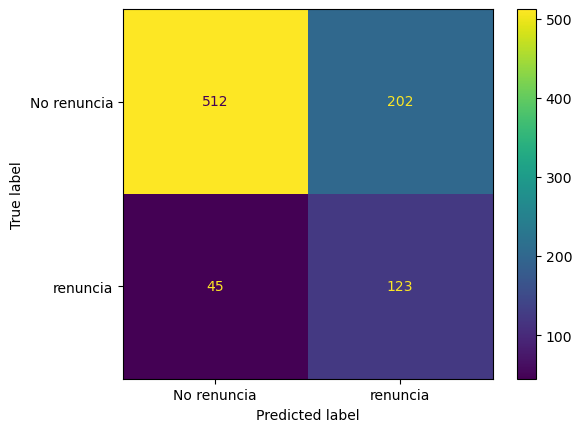

In [50]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
matriz= confusion_matrix(y_test, y_pred)
matriz_display = ConfusionMatrixDisplay(confusion_matrix=matriz, display_labels=['No renuncia', 'renuncia'])
matriz_display.plot()
plt.show()

In [51]:
tn, fp, fn, tp = matriz.ravel()

precision = tp / (tp + fp)
recall = tp / (tp + fn)
especificidad = tn / (fp + tn)
f1_score = 2*(precision*recall)/(precision+recall)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'Especificidad: {especificidad}')
print(f'F1 score: {f1_score}')

Precision: 0.37846153846153846
Recall: 0.7321428571428571
Especificidad: 0.7170868347338936
F1 score: 0.4989858012170385


## Metodo Wrapper

In [181]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, LogisticRegression

# Función recursiva de selección de características
def recursive_feature_selection(X,y,model,k):
  rfe = RFE(model, n_features_to_select=k, step=1)
  fit = rfe.fit(X, y)
  X_new = fit.support_
  print("Num Features: %s" % (fit.n_features_))
  print("Selected Features: %s" % (fit.support_))
  print("Feature Ranking: %s" % (fit.ranking_))
  return X_new  

In [182]:
# Establecer Estimador
model = LogisticRegression(max_iter=100)
# Obtener columnas seleciconadas - (3 caracteristicas)
X_new_class = recursive_feature_selection(X_train_std, y_train, model, 10)

# Nuevo conjunto de datos
df_classification_new = X_train_std[:,X_new_class]
df_classification_new
#X_train.iloc[:,X_new_class]
print(X_new_class)

Num Features: 10
Selected Features: [False False False False False False False  True False False False False
 False  True  True  True False  True False False  True False False False
 False False False False False  True  True False False False False False
 False  True False False False False False False  True]
Feature Ranking: [31 34 24 33  9 23 25  1 13  7  3 19 26  1  1  1 30  1 18 17  1 29 15 32
 14 16 35  2 22  1  1 10 21 20  8 11 12  1  4 36  5  6 28 27  1]
[False False False False False False False  True False False False False
 False  True  True  True False  True False False  True False False False
 False False False False False  True  True False False False False False
 False  True False False False False False False  True]


In [183]:
X_train.iloc[:,X_new_class]

,años_de_trabajo,tiempo_prom_dia,frecuencia_viajes_Non-Travel,frecuencia_viajes_Travel_Frequently,departamento_Human Resources,formacion_Human Resources,nombre_cargo_Manager,nombre_cargo_Manufacturing Director,estado_civil_Single,numero_capacitaciones_6
2752,20.0,6.4536,0,1,0,0,0,0,1,0
1323,9.0,7.8554,0,1,1,0,0,0,1,0
1060,11.0,7.3226,0,1,0,0,0,0,0,0
1347,7.0,6.4440,0,0,1,1,0,0,0,0
1331,25.0,8.2136,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
3276,10.0,7.0969,0,0,0,0,0,0,0,0
546,27.0,5.6867,1,0,0,0,0,0,1,0
2049,20.0,6.4356,0,1,0,0,0,0,1,0
1173,14.0,7.4542,0,0,0,0,1,0,0,0


## PARA CATEGORICAS ES MAS DESDE LO GRAFICO

## SELECCION UNIVARIANTE

## PARA VARIABLE DEPENDIENTE CATEGORICO